## USING YFINANCE TO EXTRACT STOCK DATA

In [15]:
import yfinance as yf

In [16]:
google = yf.Ticker("TSLA")

In [3]:
google_sharePrice = google.history(period = "max")
google_sharePrice

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-18 00:00:00-05:00,253.779999,258.739990,251.360001,252.080002,116416500,0.0,0.0
2023-12-19 00:00:00-05:00,253.479996,258.339996,253.009995,257.220001,106737400,0.0,0.0
2023-12-20 00:00:00-05:00,256.410004,259.839996,247.000000,247.139999,125097000,0.0,0.0


In [ ]:
# resetting the index and displaying first 5 rows of the dataset from YahooFinance

In [19]:
google_sharePrice.reset_index(inplace = True)
google_sharePrice.head

<bound method NDFrame.head of                           Date        Open        High         Low  \
0    2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333   
1    2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333   
2    2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333   
3    2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333   
4    2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333   
...                        ...         ...         ...         ...   
3391 2023-12-18 00:00:00-05:00  253.779999  258.739990  251.360001   
3392 2023-12-19 00:00:00-05:00  253.479996  258.339996  253.009995   
3393 2023-12-20 00:00:00-05:00  256.410004  259.839996  247.000000   
3394 2023-12-21 00:00:00-05:00  251.899994  254.800003  248.550003   
3395 2023-12-22 00:00:00-05:00  256.760010  258.220001  251.369995   

           Close     Volume  Dividends  Stock Splits  
0       1.592667  281494500        0.0           0.0  
1       1.588667  2

In [5]:
google.dividends

Series([], Name: Dividends, dtype: float64)

## Using Webscraping to Extract GME Revenue Data

In [25]:
import requests
from bs4 import BeautifulSoup

url = 'https://finance.yahoo.com/quote/TSLA?p=TSLA&.tsrc=fin-srch'

response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    renevue_data = soup.find('span', {'class': 'Trsdu(0.3s)'})
    if renevue_data:
        print(renevue_data)
    else:
        print('data not found')
else:
    print(f'failed to retrieve data')

data not found


In [36]:
import requests
from bs4 import BeautifulSoup

# URL of the website to scrape
url = 'https://finance.yahoo.com/quote/TSLA?p=TSLA&.tsrc=fin-srch'

# Send an HTTP request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all the titles of articles (assuming they are within <h2> tags)
    article_titles = soup.find_all('h2')

    # Print the titles
    for title in article_titles:
        print(title.text.strip())
else:
    print(f'Failed to retrieve data. Status code: {response.status_code}')


Morningstar Rating
People Also Watch
Similar to TSLA
Total ESG Risk score
Earnings
Recommendation Rating
Analyst Price Targets (38)
Upgrades & Downgrades
Company Profile


## Extracting Stock Data

In [26]:
import yfinance as yf
gme_data = yf.download('GME', start = '2022-01-01', end = '2023-01-01')
gme_data.reset_index(inplace = True)
print(gme_data.head())

[*********************100%%**********************]  1 of 1 completed
        Date       Open       High        Low      Close  Adj Close    Volume
0 2022-01-03  37.307499  39.845001  37.302502  38.209999  38.209999   5654800
1 2022-01-04  38.042500  38.247501  35.762501  37.227501  37.227501   7339600
2 2022-01-05  37.097500  37.212502  32.287498  32.342499  32.342499  13585600
3 2022-01-06  33.209999  34.424999  30.285000  32.757500  32.757500  24206000
4 2022-01-07  39.942501  40.077499  33.125000  35.154999  35.154999  48549200


## Using Webscraping to Extract GME Revenue Data

In [33]:
import requests
from bs4 import BeautifulSoup

# URL of the website to scrape
url = 'https://finance.yahoo.com/quote/GME?p=GME&.trsc=fin-srch'

# Send an HTTP request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all the titles of articles (assuming they are within <h2> tags)
    article_titles = soup.find_all('h2')

    # Print the titles
    for title in article_titles:
        print(title.text.strip())
else:
    print(f'Failed to retrieve data. Status code: {response.status_code}')


People Also Watch
Similar to GME
Earnings
Recommendation Rating
Analyst Price Targets (2)
Upgrades & Downgrades
Company Profile


## Plotting Closing Prices over years

[*********************100%%**********************]  1 of 1 completed


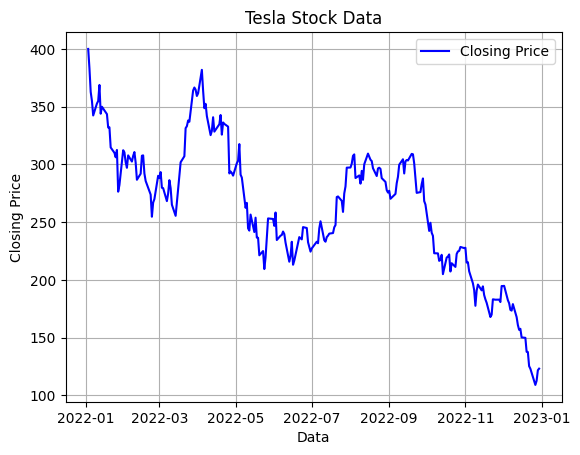

In [37]:
def graph(data, title = "Stock Data"):
    plt.figure(figure = (10,6))
    plt.plot(data['Close'], label = 'Closing Price', color = 'blue')
    plt.title(title)
    plt.xlabel('Data')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid(True)
    plt.show()

tesla_data = yf.download('TSLA', start ='2022-01-01', end = '2023-01-01')
graph(tesla_data, title = 'Tesla Stock Data')

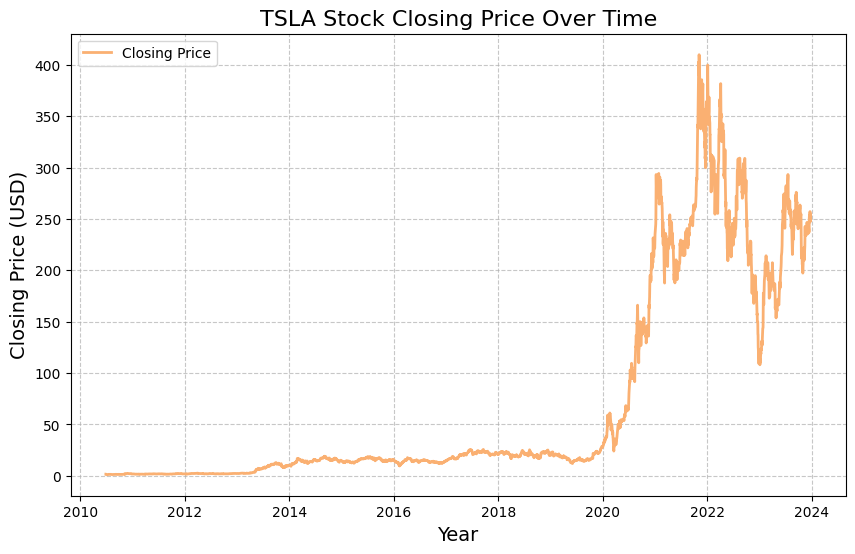

In [6]:
# Assuming 'google_sharePrice' is your DataFrame with 'Close' prices and 'Date' as the index
import matplotlib.pyplot as plt
# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the closing prices
plt.plot(google_sharePrice['Close'], label='Closing Price', color= '#FAB072', linewidth=2)

# Title and labels
plt.title('TSLA Stock Closing Price Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Closing Price (USD)', fontsize=14)

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adding legend
plt.legend(fontsize=10)

# Show the plot
plt.show()